In [118]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.neighbors import KernelDensity
from sklearn import metrics

import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
# leb_df = pd.read_csv('../pro-test/data/leb_cleand.csv')
full_df = pd.read_csv('../pro-test/data/full_df.csv')

In [61]:
full_df.shape

(13387, 38)

In [62]:
full_df['sizeexact'] = full_df['sizeexact'].fillna(0)
full_df['sizeestimate'] = full_df['sizeestimate'].fillna(0)
full_df['combined_sizes'] = full_df['sizeexact'] + full_df['sizeestimate']
full_df.drop(columns=['sizeexact','sizeestimate'], inplace=True)

In [63]:
full_df.shape

(13387, 37)

In [64]:
mean_size_imputer = SimpleImputer(missing_values=-99,strategy="mean")
full_df['combined_sizes'] = mean_size_imputer.fit_transform(full_df[['combined_sizes']])

In [65]:
full_df.columns

Index(['startdate', 'governorate', 'district', 'gpslatend', 'gpslongend',
       'locationtypeend', 'demandtypeone', 'demandtypetwo', 'orgtypefirst',
       'tacticprimary', 'tacticsecondary', 'violence', 'propertydamage',
       'repression', 'teargas', 'rubberbullets', 'liveammo', 'sticks',
       'surround', 'dogs', 'cleararea', 'policerepress', 'milrepress',
       'beltegeyyarepress', 'militiarepress', 'partyrepress',
       'employerrepress', 'otherrepress', 'killed', 'injured', 'arrested',
       'country', 'target', 'MBproperty', 'residentsrepress', 'MBrepress',
       'combined_sizes'],
      dtype='object')

In [66]:
# combined_sizes = full_df[['combined_sizes']]

In [67]:
data = full_df.drop(columns=['orgtypefirst','startdate','gpslatend','gpslongend','district','demandtypetwo','tacticsecondary','propertydamage',
       'teargas', 'rubberbullets', 'liveammo', 'sticks',
       'surround', 'dogs', 'cleararea', 'policerepress', 'milrepress',
       'militiarepress', 'partyrepress', 'employerrepress','target',
       'otherrepress', 'killed', 'injured', 'arrested','beltegeyyarepress','MBrepress','MBproperty','residentsrepress'])

In [68]:
data.dropna(inplace=True)

In [69]:
binary_data = data.copy()

In [70]:
binary_data['binary_target'] = np.where(binary_data['repression']!= 'No known coercion, no security presence', 1, 0)

In [71]:
binary_data.binary_target.value_counts()

0    10580
1     2800
Name: binary_target, dtype: int64

In [72]:
X = data.drop(columns='repression')
y = data[['repression']]

In [83]:
ohe = OneHotEncoder()
X = ohe.fit_transform(X)

In [90]:
X = X.toarray()

In [91]:
oen = OrdinalEncoder()
y = oen.fit_transform(y)

In [92]:
# y = pd.get_dummies(full_df['repression'])
# y.columns = y.columns.str.replace(' ', '_')
# y.columns = y.columns.str.replace('/', '')
# y.columns = y.columns.str.replace(',', '')

In [93]:
# data = pd.concat([X,y],axis=1)
# data.columns

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.2)
kde.fit(X_train)
kde.score_samples(X)

array([217.79093746, 217.79093746, 216.69232517, ..., 217.38547235,
       194.040531  , 217.79093746])

In [96]:
kde.score(X_test, y_test)

912044.9789338124

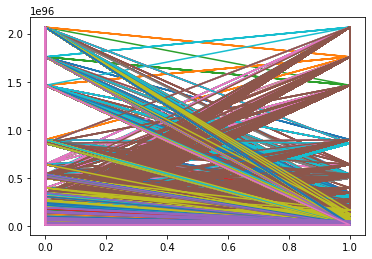

In [120]:
plt.plot(X_train, np.exp(kde.score_samples(X_train)))
plt.show()

In [97]:
clf = DecisionTreeClassifier(random_state=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [98]:
clf.score(X_test, y_test)

0.765625

In [164]:
# X_test_new = pd.DataFrame({'governorate':['Baghdad'], 'locationtypeend':['Midan'], 'demandtypeone':['Politics (national)'],
#                            'tacticprimary':['Demonstration / protest'],'violence':['Riot'],'country':['Iraq']})
# X_test_new

In [101]:
score_baseline = cross_val_score(clf,
                                 X_test, y_test,
                                 cv=10)
score_baseline

/home/noahdarwich/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_split.py:665: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.760181  , 0.71719457, 0.77149321, 0.73529412, 0.75339367,
       0.74208145, 0.76417234, 0.74829932, 0.75963719, 0.7755102 ])

In [102]:
score_baseline.mean()

0.7527257056668821

In [167]:
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7744360902255639